In [1]:
import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)


In [4]:
saved_style_state = matplotlib.rcParams.copy()


In [5]:
uber_data = pd.read_csv("data_project_uber.csv")

# Uber Pick Ups in New York 🏙️🗽

#### with weather and holiday information!

In [6]:
uber_data = pd.read_csv(
    "data_project_uber.csv",
    infer_datetime_format=True,
    parse_dates=["date"],
    dayfirst=True,
)


/tmp/ipykernel_15685/1801693829.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  uber_data = pd.read_csv(


In [7]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(uber_data.date.min(), date_format_pattern)
latest_date = datetime.strftime(uber_data.date.max(), date_format_pattern)
f"dates from {earliest_date} to {latest_date}"


'dates from January, 2015 to June, 2015'

## Map of NYC 🗺️

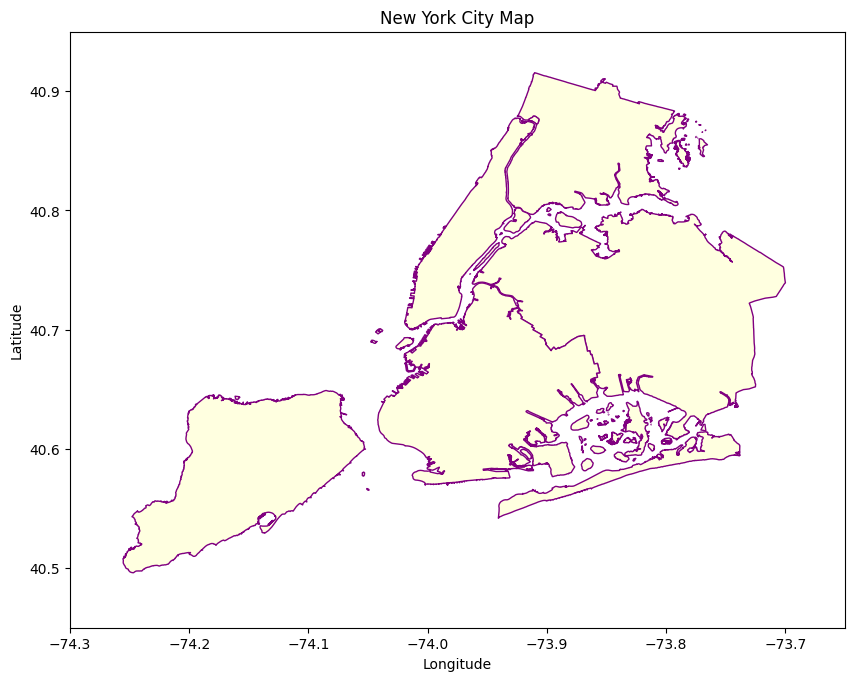

In [8]:
nyc = gpd.read_file("nyc_geomap.shp")

fig, ax = plt.subplots(figsize=(10, 10))
nyc.plot(ax = ax, color = 'lightyellow', edgecolor = 'purple', linewidth = 1)
ax.set_title('New York City Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-74.3, -73.65)
ax.set_ylim(40.45, 40.95)
plt.show()

## Pick Ups and Time 🕒

Text(0.5, 1.0, 'Pick Ups in relation to Time')

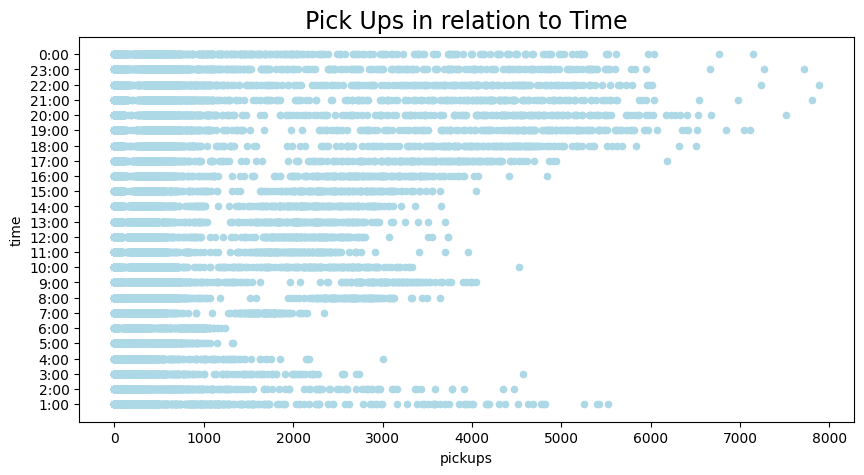

In [9]:
uber_data.plot(x = "pickups", y = "time", kind = "scatter", color = "lightblue")
plt.title('Pick Ups in relation to Time', size = 17)


Times with Most Pickups : 6pm - 8pm

Times with Least Pickups : 4am - 6am
##### What's Interesting : evening peak hours have more Uber pickup rates compared to morning peak hours

## Pick Ups and Days of the Week ☀️🌙

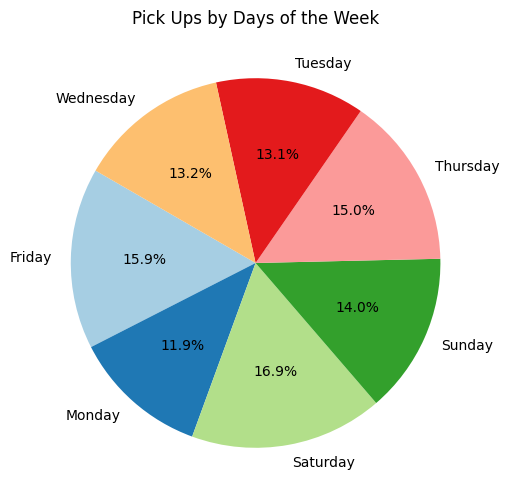

In [10]:
def my_f(x):
    return datetime.strftime(x.date, "%A")

uber_data["days"] = uber_data.apply(my_f, axis = 1)

pickups_day = uber_data.groupby('days')['pickups'].sum()

plt.figure(figsize = (10, 6))
plt.pie(pickups_day, labels = pickups_day.index, autopct = '%1.1f%%', startangle = 150, colors = plt.cm.Paired.colors)
plt.title('Pick Ups by Days of the Week')
plt.show()


## Pick Ups and Holidays 🎆🍹

Text(0.5, 1.0, 'Pick Ups on Holidays vs. Non-Holidays')

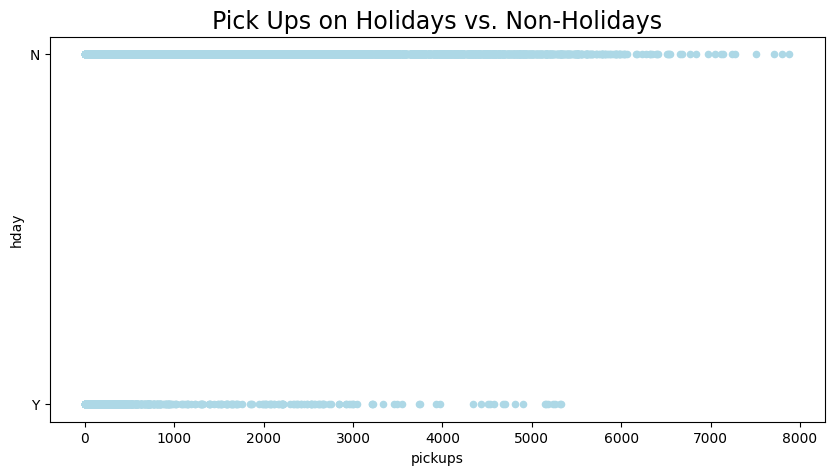

In [11]:
uber_data.plot(x = "pickups", y = "hday", kind = "scatter", color = "lightblue")
plt.title('Pick Ups on Holidays vs. Non-Holidays', size = 17)


### Highest Point(s)

Text(0.5, 1.0, 'Distribution of pickups more than 7000')

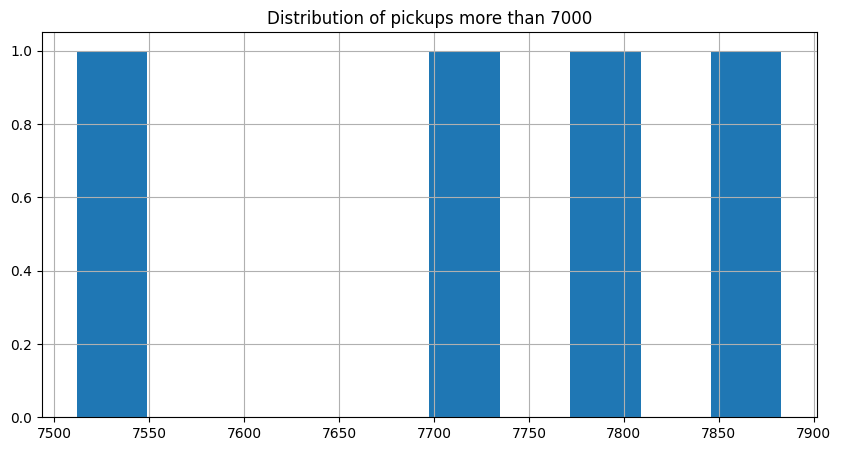

In [12]:
uber_data.pickups[uber_data.pickups > 7500].hist()
plt.title(f"Distribution of pickups more than 7000")

In [13]:
value = 7883
result_rows = uber_data[uber_data['pickups'] == value]

print(result_rows.iloc[0])


date       2015-06-27 00:00:00
time                     22:00
borough              Manhattan
pickups                   7883
spd                        8.0
vsb                        5.5
temp                      60.0
dewp                      56.5
slp                     1016.9
pcp01                    0.065
pcp06                      0.0
pcp24                      0.0
sd                         0.0
hday                         N
days                  Saturday
Name: 28604, dtype: object


In [14]:
value = 7801
result_rows = uber_data[uber_data['pickups'] == value]

print(result_rows.iloc[0])

date       2015-06-27 00:00:00
time                     21:00
borough              Manhattan
pickups                   7801
spd                        8.0
vsb                        3.5
temp                      61.5
dewp                      56.0
slp                     1017.0
pcp01                    0.045
pcp06                      0.0
pcp24                      0.0
sd                         0.0
hday                         N
days                  Saturday
Name: 28597, dtype: object


In [15]:
value = 7711
result_rows = uber_data[uber_data['pickups'] == value]

print(result_rows.iloc[0])

date       2015-06-27 00:00:00
time                     23:00
borough              Manhattan
pickups                   7711
spd                      10.25
vsb                        3.2
temp                     60.75
dewp                     57.25
slp                     1015.7
pcp01                 0.076667
pcp06                     0.01
pcp24                      0.0
sd                         0.0
hday                         N
days                  Saturday
Name: 28611, dtype: object


In [16]:
value = 7512
result_rows = uber_data[uber_data['pickups'] == value]

print(result_rows.iloc[0])

date       2015-06-27 00:00:00
time                     20:00
borough              Manhattan
pickups                   7512
spd                        9.0
vsb                        8.0
temp                      65.0
dewp                      55.0
slp                     1018.2
pcp01                     0.01
pcp06                      0.0
pcp24                     0.25
sd                         0.0
hday                         N
days                  Saturday
Name: 28590, dtype: object


## Pick Ups and Weather ⛅️❄️

### Pick Ups and Temperature 🌡

Text(0.5, 1.0, 'Pick Ups in relation to Temperature')

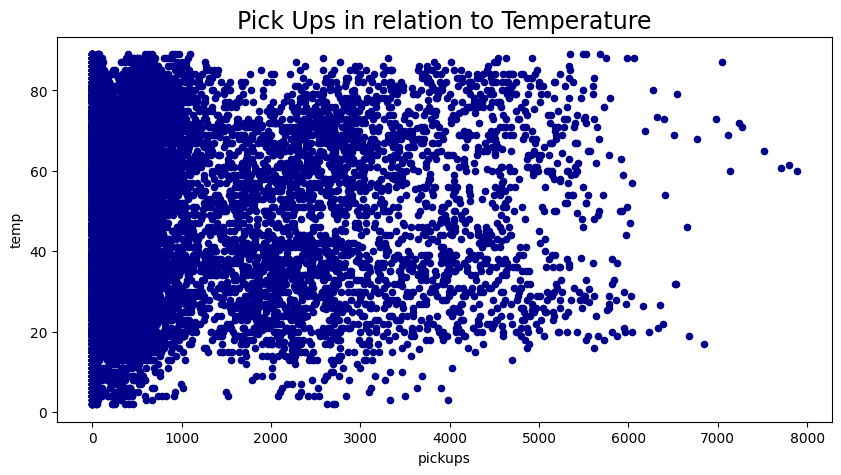

In [17]:
uber_data.plot(x = "pickups", y = "temp", kind = "scatter", color = "darkblue")
plt.title('Pick Ups in relation to Temperature', size = 17)

⬆️ temp = ⬆️ pickups

⬇️ temp = ⬇️ pickups

### Pick Ups and Snow Depth ☃️

Text(0.5, 1.0, 'Pick Ups in relation to Snow Depth')

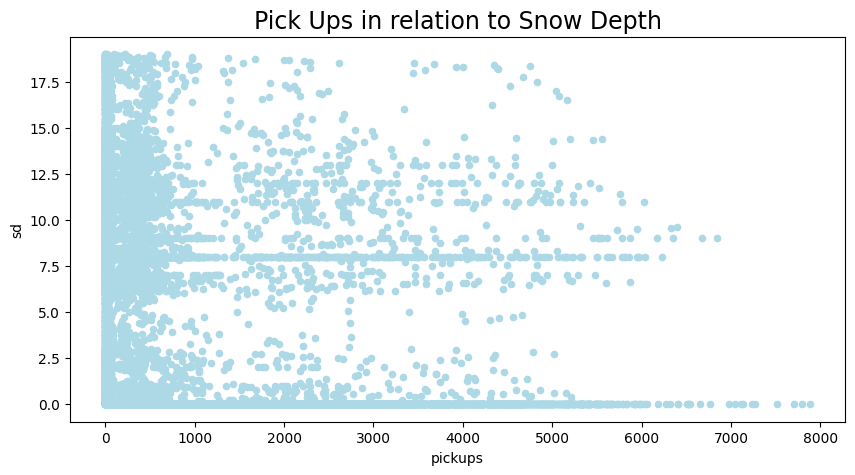

In [18]:
uber_data.plot(x="pickups", y="sd", kind="scatter", color = "lightblue")
plt.title('Pick Ups in relation to Snow Depth', size = 17)

## Pickups and Boroughs 🌇

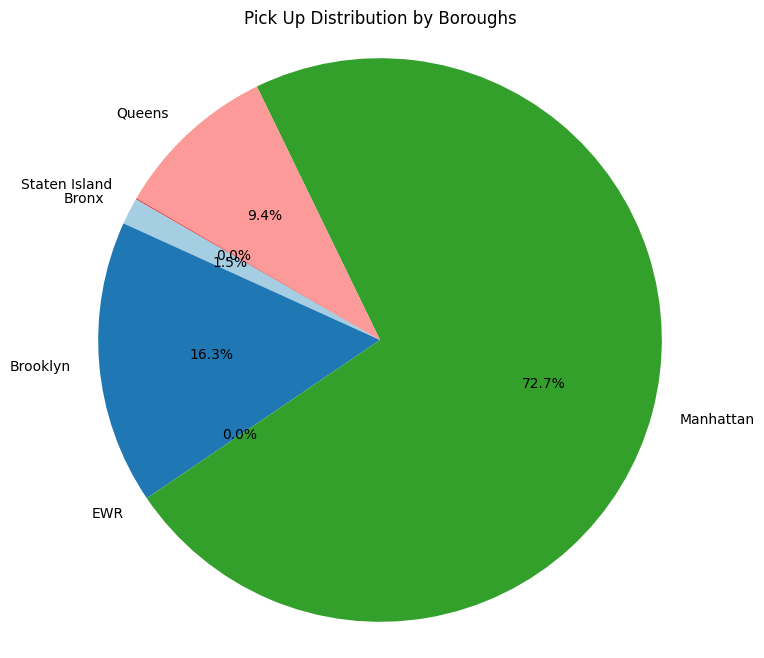

In [19]:
borough_pickups = uber_data.groupby('borough')['pickups'].sum()

plt.figure(figsize = (8, 8))
plt.pie(borough_pickups, labels = borough_pickups.index, autopct = '%1.1f%%', startangle = 150, colors = plt.cm.Paired.colors)
plt.title('Pick Up Distribution by Boroughs')
plt.axis('equal')  
plt.show()